# Pandas

In [1]:
import pandas as pd
from sklearn import datasets

In [3]:
iris_dataset = datasets.load_iris()

In [4]:
X = iris_dataset.data[:,:2]

In [6]:
x_count = len(X.flat)
x_min = X[:,0].min() - .5
x_max = X[:, 0].max() + .5
x_mean = X [:, 0].mean()

In [7]:
x_count, x_min, x_max, x_mean

(300, 3.8, 8.4, 5.843333333333334)

## checking version

In [24]:
import sys 
import scipy 
#imports all the functions from the NumPy namespace, and in addition provides

import matplotlib
#An object-oriented plotting library.

import pandas as pd
# a powerful data analysis and manipulation library for Python

import sklearn
#sklearn is a Python module integrating classical machine learning 
#algorithms in the tightly-knit world of scientific Python
#packages (numpy, scipy, matplotlib).

In [87]:
#load libraries

from pandas.plotting import scatter_matrix

import matplotlib.pyplot as plt

from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [29]:
#iris dataset link to download
path =  "/media/lgi/Disk1/professional/iris/iris.data"

#list of variables taken from the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']

dataset = pd.read_csv(path, names=names)

In [31]:
print(dataset.shape) 

#no of rows and columns

(150, 5)


In [32]:
print(dataset.head(30))

    sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

In [36]:
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [42]:
print(dataset.groupby('sepal-length').size())

sepal-length
4.3     1
4.4     3
4.5     1
4.6     4
4.7     2
4.8     5
4.9     6
5.0    10
5.1     9
5.2     4
5.3     1
5.4     6
5.5     7
5.6     6
5.7     8
5.8     7
5.9     3
6.0     6
6.1     6
6.2     4
6.3     9
6.4     7
6.5     5
6.6     2
6.7     8
6.8     3
6.9     4
7.0     1
7.1     1
7.2     3
7.3     1
7.4     1
7.6     1
7.7     4
7.9     1
dtype: int64


### plot univariate and mutivarite for variables

sepal-length       Axes(0.125,0.53;0.352273x0.35)
sepal-width     Axes(0.547727,0.53;0.352273x0.35)
petal-length       Axes(0.125,0.11;0.352273x0.35)
petal-width     Axes(0.547727,0.11;0.352273x0.35)
dtype: object

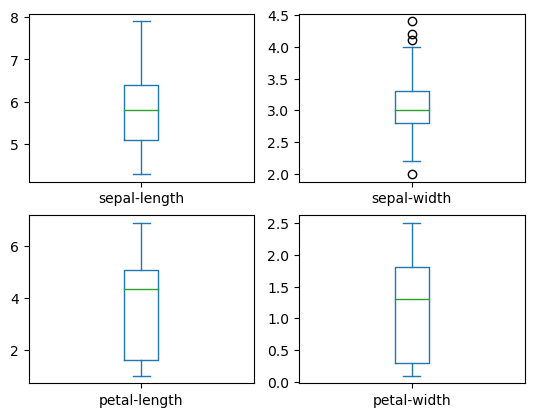

In [52]:
dataset.plot(kind = 'box', subplots = True, layout=(2,2), sharex = False, sharey = False)


#sharex = coordinate visualization
#sharey = 

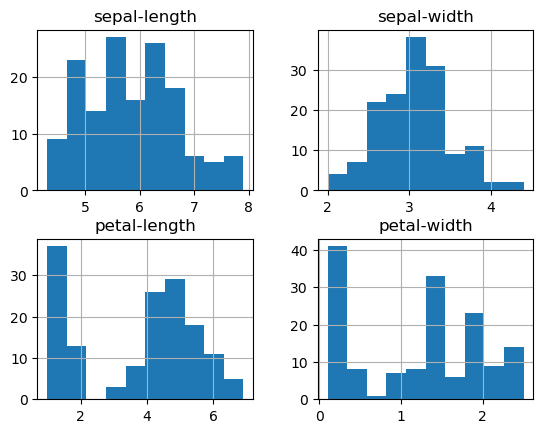

In [57]:
#to show data in histogram

dataset.hist()
plt.show()

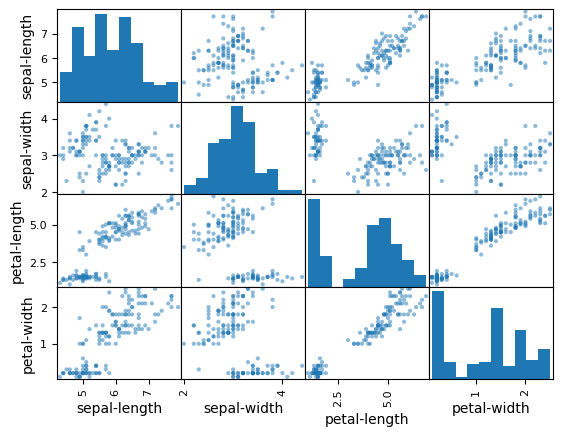

In [58]:
scatter_matrix(dataset)
plt.show()

#show high correlation and predicatable relationship

## create model

In [89]:
array = dataset.values

x = array[:,0:4] 
# ':' in this context means we want to include all rows of the array is used to separate the indexing for different axes of the array. 
# In this case ',' it separates the indexing for rows and columns.

y = array[:,4]

validation_size = 0.20
seed = 6 


In [90]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = validation_size, random_state = seed)

In [77]:
seed = 6
scoring = 'accuracy'
    #to build and evaluate 


### Building models

In [99]:

#Spot check algo

# List of models
models = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [79]:
models

[('LR', sklearn.linear_model._logistic.LogisticRegression),
 ('LDA', sklearn.discriminant_analysis.LinearDiscriminantAnalysis),
 ('KNN', sklearn.neighbors._classification.KNeighborsClassifier),
 ('CART', sklearn.tree._classes.DecisionTreeClassifier),
 ('NB', sklearn.naive_bayes.GaussianNB),
 ('SVM', SVC())]

In [80]:
#evaluate each model in turn

In [105]:
result = []
result_2 = []

names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10,shuffle=True, random_state= seed)
    cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    result.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.958333 (0.041667)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
CART: 0.941667 (0.053359)
NB: 0.966667 (0.040825)
SVM: 0.941667 (0.053359)


/home/lgi/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/lgi/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

# Coding for Linear regression 

In [107]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0,10.0)

In [111]:
cd Linear_Regression/

/home/lgi/Desktop/Linear_Regression


In [118]:
cd Desktop/Linear_Regression/

/home/lgi/Desktop/Linear_Regression


In [119]:
#reading data
data = pd.read_csv('headbrain.csv')

In [120]:
print(data.shape)

(237, 4)


In [123]:
data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [171]:
#collect X and Y 

X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

In [172]:
# Consider y = mx+c

#Mean of X and Y

mean_x = np.mean(X)
mean_y = np.mean(Y)

#n = total number of values
array = len(X)

# using formula to calculate b1 and b2
numerator = 0
denominator = 0

#numerator += (x[i] - mean_x)*(y[i] - mean_y)
    #Here x[i], i defines the index of x values which is going to put in the loop.

for i in range(array):
    numerator += (X[i] - mean_x)*(Y[i] - mean_y)
    denominator += (X[i] - mean_x)**2
    
b1 = numerator/denominator
b0 = mean_y - (b1 * mean_x)

In [173]:
print(b1,b0)

0.26342933948939945 325.57342104944223


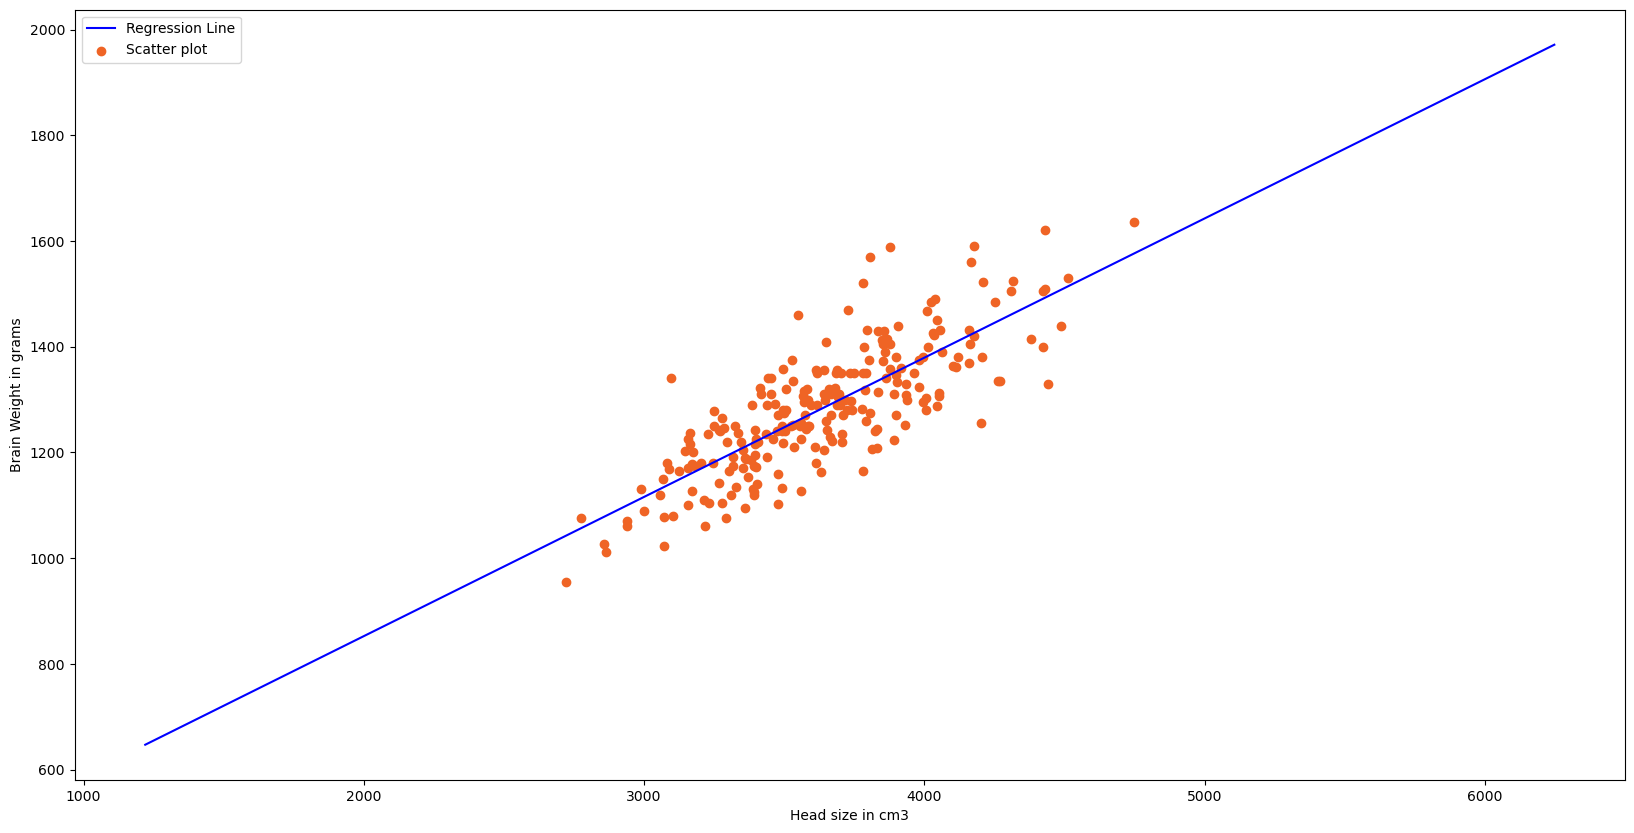

In [184]:
#Plotting values and regression line

max_x = np.max(x) + 100
min_x = np.min(x) - 100

#calculatae line values x and y
x = np.linspace(min_x,max_x, 1000)
y = b1*x + b0 

#plotting line 
plt.plot(x,y, c ='blue', label = 'Regression Line')

#Plotting scatter points
plt.scatter(X,Y , c='#ef6425', label = 'Scatter plot')
plt.xlabel('Head size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

In [175]:
#to check the quality of model

ss_t = 0
ss_r = 0

for i in range(array):
    y_pred = b0 + b1*X[i]
    ss_t += (Y[i] - mean_y)**2 #sum of square of residuals
    ss_r += (Y[i] - y_pred)**2 #Total sum of squares

r2 =  1 - (ss_r/ss_t)
print(r2)

0.6393117199570003


##  Implementing model

In [176]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [178]:
#Cannot use Rank 1 matrix in scikit learn
X = X.reshape((array, 1)) #Returns an array containing the same data with a new shape.

#creating model

reg = LinearRegression()

#fitting training data
reg = reg.fit(X, Y)

Y_pred = reg.predict(X)

#Calculating R2 score
r2_score = reg.score(X, Y)

print(r2_score)

0.639311719957


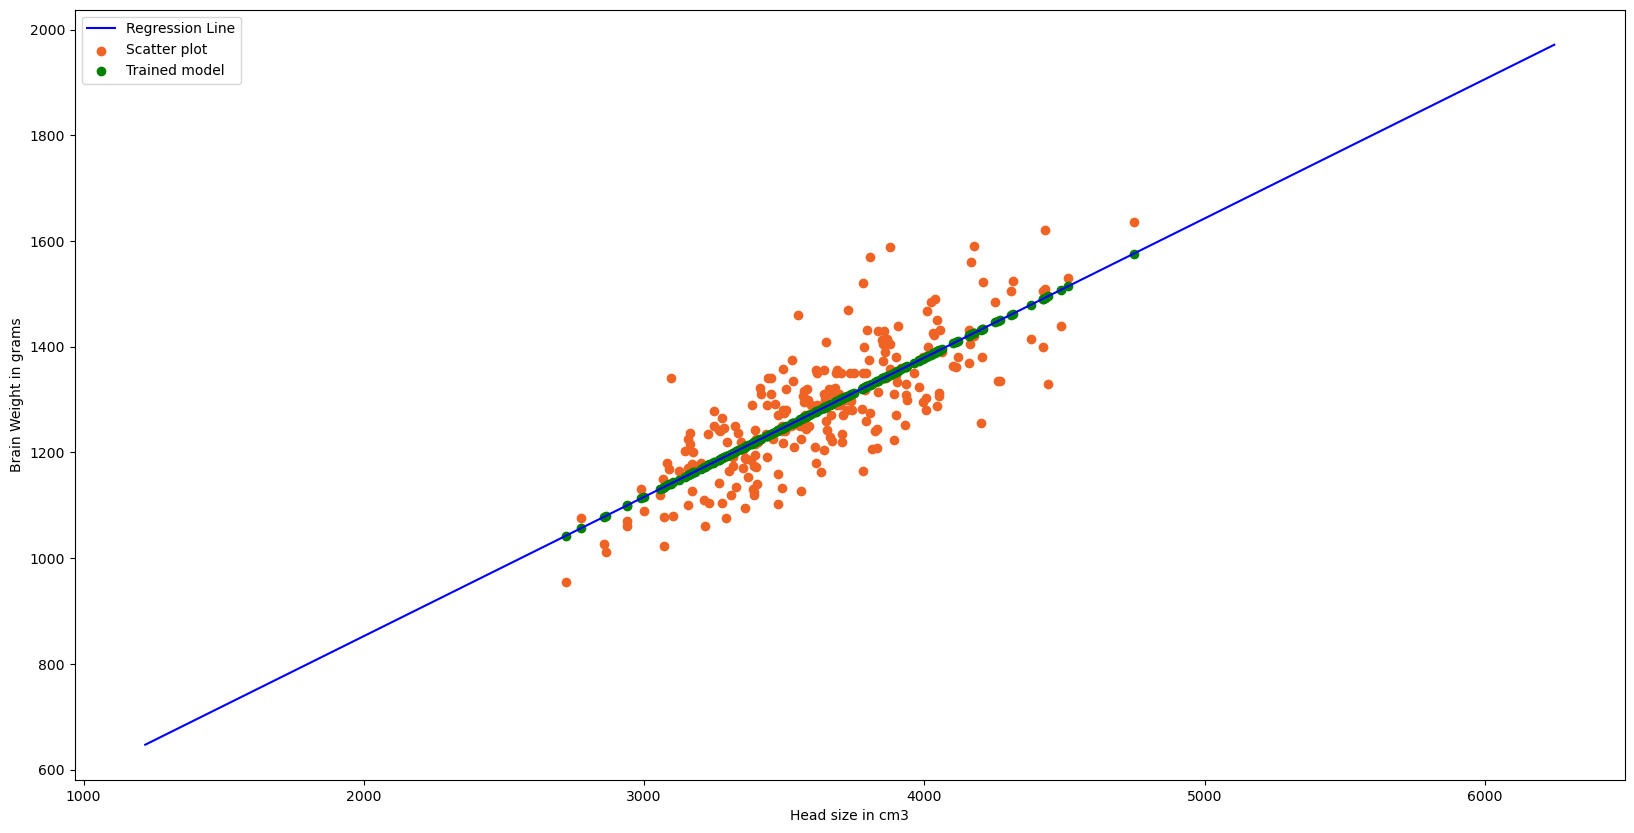

In [186]:

#plotting line 
plt.plot(x,y, c ='blue', label = 'Regression Line')

#Plotting scatter points
plt.scatter(X,Y , c='#ef6425', label = 'Scatter plot')
plt.scatter(X,Y_pred, c='green', label = 'Trained model')
plt.xlabel('Head size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()